In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [2]:
def generate_balanced_sequence(length):
    seq = []
    for _ in range(length // 2):
        seq.append('(')
    for _ in range(length // 2):
        seq.append(')')
    return ''.join(seq)

def generate_unbalanced_sequence(length):
    seq = [random.choice(['(', ')']) for _ in range(length)]
    if seq.count('(') == seq.count(')'):
        seq[-1] = '('
    return ''.join(seq)

In [3]:
def generate_dataset(n_samples=30000, maxlen=30):
    X, y = [], []
    for _ in range(n_samples // 2):
        s = generate_balanced_sequence(random.choice(range(6, maxlen, 2)))
        X.append(s)
        y.append(1)
    for _ in range(n_samples // 2):
        s = generate_unbalanced_sequence(random.randint(6, maxlen))
        X.append(s)
        y.append(0)
    return X, y

X_text, y = generate_dataset()

In [4]:
char_to_int = {'(': 1, ')': 2}
X_seq = [[char_to_int[c] for c in seq] for seq in X_text]
max_seq_len = max(len(x) for x in X_seq)
X_pad = pad_sequences(X_seq, maxlen=max_seq_len, padding='post')
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42, stratify=y)



In [5]:
def build_model(cell_type='LSTM'):
    model = Sequential()
    model.add(Embedding(input_dim=3, output_dim=16, input_length=max_seq_len))
    if cell_type == 'RNN':
        model.add(SimpleRNN(32))
    elif cell_type == 'GRU':
        model.add(GRU(32))
    else:
        model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
results = {}
models = {}

for cell in ['RNN', 'LSTM', 'GRU']:
    print(f"\nTraining {cell} model...")
    model = build_model(cell)
    history = model.fit(
        X_train, np.array(y_train),
        validation_split=0.2,
        epochs=5,
        batch_size=64,
        verbose=1
    )
    score = model.evaluate(X_test, np.array(y_test), verbose=0)
    print(f"{cell} Test Accuracy: {score[1]*100:.2f}%")
    results[cell] = history
    models[cell] = model


Training RNN model...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8630 - loss: 0.3455 - val_accuracy: 0.9592 - val_loss: 0.1754
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9559 - loss: 0.1646 - val_accuracy: 0.9683 - val_loss: 0.1262
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9544 - loss: 0.1492 - val_accuracy: 0.9673 - val_loss: 0.1138
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9731 - loss: 0.1016 - val_accuracy: 0.9756 - val_loss: 0.0876
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9804 - loss: 0.0868 - val_accuracy: 0.9842 - val_loss: 0.0675
RNN Test Accuracy: 98.87%

Training LSTM model...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8539 - loss: 0.3419 - val_accuracy: 0.9990 - val_loss: 0.0236
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9946 - loss: 0.0230 - val_accuracy: 0.9994 - val_loss: 0.0047
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9987 - loss: 0.0073 - val_accuracy: 0.9996 - val_loss: 0.0034
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9992 - loss: 0.0051 - val_accuracy: 0.9998 - val_loss: 0.0013
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9896 - loss: 0.0505 - val_accuracy: 0.9983 - val_loss: 0.0211
LSTM Test Accuracy: 99.85%

Training GRU model...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7737 - loss: 0.4163 - val_accuracy: 0.9892 - val_loss: 0.0542
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9867 - loss: 0.0484 - val_accuracy: 0.9946 - val_loss: 0.0252
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9961 - loss: 0.0198 - val_accuracy: 0.9969 - val_loss: 0.0144
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9982 - loss: 0.0103 - val_accuracy: 0.9985 - val_loss: 0.0098
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9985 - loss: 0.0099 - val_accuracy: 0.9950 - val_loss: 0.0269
GRU Test Accuracy: 99.48%


In [7]:
def predict_sequence(model, seq_str):
    seq_encoded = [char_to_int[c] for c in seq_str]
    seq_padded = pad_sequences([seq_encoded], maxlen=max_seq_len, padding='post')
    prob = model.predict(seq_padded, verbose=0)[0][0]
    return prob, "Balanced" if prob >= 0.5 else "Unbalanced"

test_sequences = [
    "(()(()))",   # balanced
    "(()())(()",  # unbalanced
    "((()))",     # balanced
    "()))(",      # unbalanced
]

print("\n=== Sample Predictions ===")
for seq in test_sequences:
    print(f"\nSequence: {seq}")
    for name, model in models.items():
        prob, label = predict_sequence(model, seq)
        print(f"{name}: {label} ")


=== Sample Predictions ===

Sequence: (()(()))
RNN: Unbalanced 
LSTM: Unbalanced 
GRU: Unbalanced 

Sequence: (()())(()
RNN: Unbalanced 
LSTM: Unbalanced 
GRU: Unbalanced 

Sequence: ((()))
RNN: Balanced 
LSTM: Balanced 
GRU: Balanced 

Sequence: ()))(
RNN: Unbalanced 
LSTM: Unbalanced 
GRU: Unbalanced 


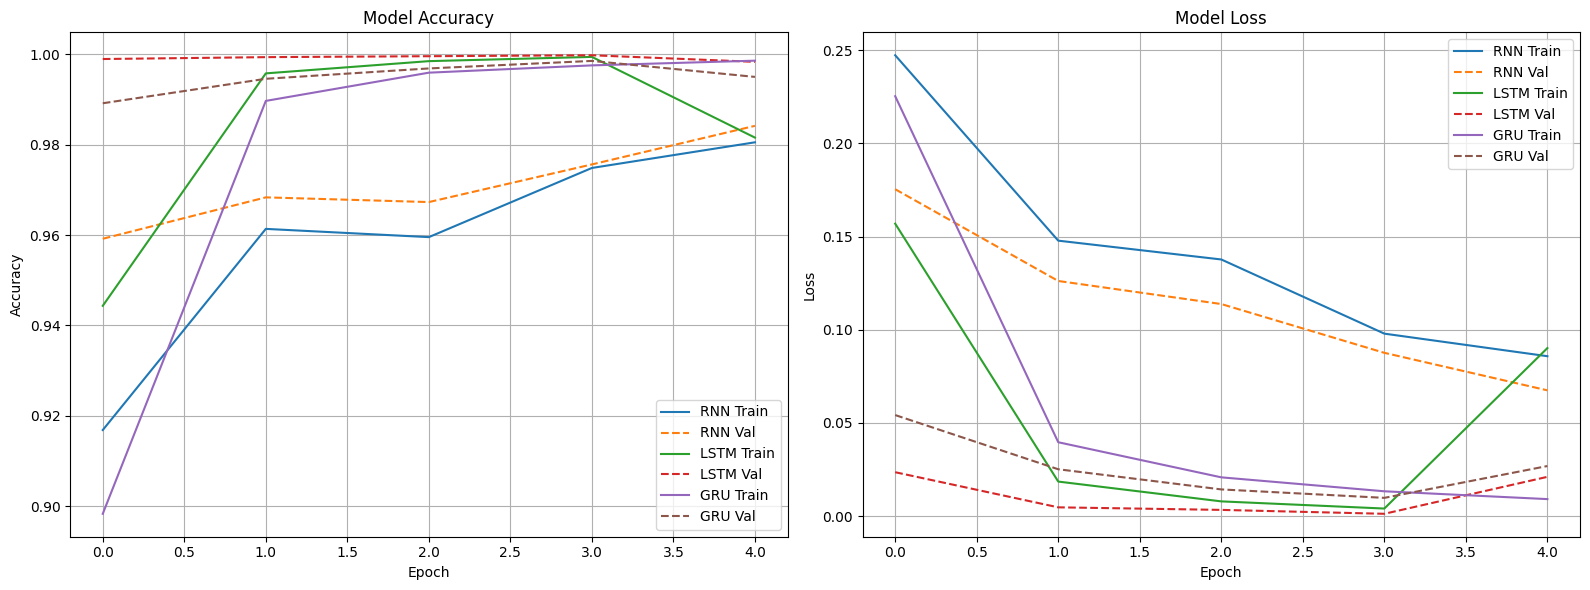

In [9]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for cell_type, history in results.items():
    plt.plot(history.history['accuracy'], label=f'{cell_type} Train')
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f'{cell_type} Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for cell_type, history in results.items():
    plt.plot(history.history['loss'], label=f'{cell_type} Train')
    plt.plot(history.history['val_loss'], linestyle='--', label=f'{cell_type} Val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
